In [5]:
%pip install neuralforecast
%pip install tsfresh


Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS,RNN,LSTM
from neuralforecast.tsdataset import TimeSeriesDataset
from neuralforecast.utils import AirPassengersDF as Y_df

# Split train/test and declare time series dataset
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31']   # 12 test
dataset, *_ = TimeSeriesDataset.from_df(Y_train_df)



models = NeuralForecast(
    models = [NBEATS(input_size=24, h=12, max_steps=100),RNN(h=12, config=None, num_samples=1, cpus=1)],
    freq = 'M'
),



models[0].fit(df=Y_train_df)
prediction = models[0].predict()



Seed set to 1
Seed set to 1


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 34.46it/s, v_num=20, train_loss_step=9.080, train_loss_epoch=9.080]


TypeError: Trainer.__init__() got an unexpected keyword argument 'config'

In [6]:
prediction

,ds,NBEATS
unique_id,,
1.0,1961-01-31,446.928528
1.0,1961-02-28,427.024109
1.0,1961-03-31,491.765533
1.0,1961-04-30,500.315826
1.0,1961-05-31,510.048340
1.0,1961-06-30,581.987793
1.0,1961-07-31,677.017456
1.0,1961-08-31,665.135132
1.0,1961-09-30,581.702026


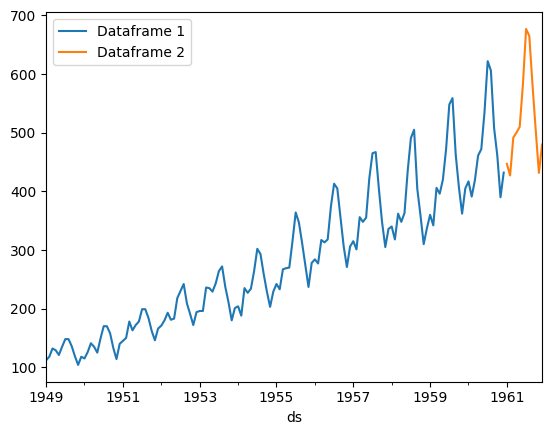

In [7]:
import matplotlib.pyplot as plt


Y_df.plot(x='ds', y='y', kind='line', label='Dataframe 1', ax=plt.gca())

prediction.plot(x='ds', y='NBEATS', kind='line', label='Dataframe 2', ax=plt.gca())

plt.show()


In [8]:
from tsfresh import extract_features
extracted_features = extract_features(Y_df, column_id="unique_id", column_sort="ds")

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]


In [14]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
extracted_features

,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7
1.0,1.0,0.0,0.0,1.0,40363.0,13371737.0,25.86014,2.237762,0.126761,265.5,...,0.144565,0.144565,0.554549,1.635924,2.676262,3.425027,3.976887,4.35692,0.0,554.714294
